Import the Necessary Libraries

In [39]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Load Handwritten numbers Datasets with Train and Test split

In [40]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Check the shape of train and Test data. The Train data has 60000 records and Test with 10000 records

In [41]:
X_train.shape

(60000, 28, 28)

In [42]:
y_train.shape

(60000,)

In [43]:
X_test.shape

(10000, 28, 28)

In [44]:
y_test.shape

(10000,)

All Data used for Modeling needs to be Normalised

In [45]:
X_train_scaled =  X_train/255
X_test_scaled = X_test/255

Compare a particular X and Y values of train data. Y has the aactual value and X is in Matrix format , using plt.matshow method to plot the image

In [67]:
y_train[2]

4

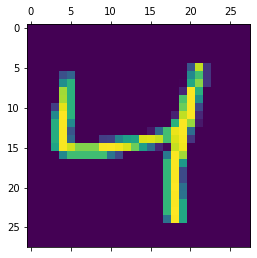

In [47]:
plt.matshow(X_train[2])

Printing the scaled shape to confirm the shapes are not messed up

In [48]:
X_train_scaled.shape

(60000, 28, 28)

In [49]:
len(X_train_scaled)

60000

The data needs to be Reshaped to (*, 784) Matrix as each is passed on to Input layer

In [50]:
X_train_flattened = X_train_scaled.reshape(len(X_train_scaled), 28 * 28)
X_test_flattened = X_test_scaled.reshape(len(X_test_scaled), 28 * 28)

In [51]:
X_train_flattened.shape

(60000, 784)

Our First Model , a very simple Dense layer With 10 output (as we have 0-10 classifications), Input shape as 784. Activation function as 'Sigmoid' since we have used ths to classify in the outputput layer. 'Sigmoid' provides value between 0 to 1. Fits the model, the accuracy is good 92%

In [52]:
model = keras.Sequential(
    [
     keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') 
    ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.summary()
model.fit(X_train_flattened, y_train, epochs=5)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4675 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3043 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2731 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2667 - accuracy: 0.9259


Verified the Test data. Performs with same accuracy and loss as Train data

In [53]:
model.evaluate(X_test_flattened, y_test)
y_test_predict = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step - loss: 0.2664 - accuracy: 0.9267


Out of all predicted Y_test_predict output getting the index with maximum probability. i.e, if index 6 has max probability, the model has predicted '6'  

In [54]:
y_test_predict_final = [np.argmax(i) for i in y_test_predict]

A simple method to compare if the predicted and actual are matching.  Pass any index between 0-10000

In [70]:
def TestResult(index):
  print(f'The Predicted number is :{y_test_predict_final[index]}')
  print('The actual number in Image is')
  plt.matshow(X_test[index])


The Predicted number is :6
The actual number in Image is


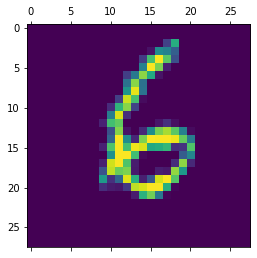

In [71]:
TestResult(2000)

Added an additional layer and the model prediction has improved from 92% to 98% with reduction in loss further

In [57]:
model = keras.Sequential(
    [
     keras.layers.Dense(100, input_shape=(784,), activation='relu'),
     keras.layers.Dense(10, activation='sigmoid')
    ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.summary()
model.fit(X_train_flattened, y_train, epochs=5)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1274 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0881 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0685 - accuracy: 0.9789
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0540 - accuracy: 0.9829


In [58]:
model.evaluate(X_test_flattened, y_test)
y_test_predict = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step - loss: 0.0919 - accuracy: 0.9731


Instead of reshaping Added an additional layer to Flatten

In [59]:
model = keras.Sequential(
    [
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(100, activation='relu'),
     keras.layers.Dense(10, activation='sigmoid')
    ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2738 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1306 - accuracy: 0.9617
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0913 - accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0691 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0541 - accuracy: 0.9836


In [60]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0845 - accuracy: 0.9732


[0.08446389436721802, 0.9732000231742859]

In [61]:
y_test_predict = model.predict(X_test_scaled)

All looks good. To play around have increased the Epoch to 100 which has slight increase in accuracy on train and a slight reduction in test

In [62]:
model = keras.Sequential(
    [
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(100, activation='relu'),
     keras.layers.Dense(10, activation='sigmoid')
    ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9250
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1222 - accuracy: 0.9636
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0848 - accuracy: 0.9746
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9804
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0521 - accuracy: 0.9839
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0413 - accuracy: 0.9872
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0343 - accuracy: 0.9895
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9916
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0233 - accuracy: 0.9927
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

In [63]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2392 - accuracy: 0.9774


[0.2391817420721054, 0.977400004863739]

In [64]:
y_test_predict = model.predict(X_test_scaled)

Feel free to play around further by changing the loss\optimiser or by adding additional layers. Happy coding :)